In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blood-donor-dataset/blood_donor_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/blood-donor-dataset/blood_donor_dataset.csv')
df

,donor_id,name,email,password,contact_number,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated,created_at
0,1b8b4c828a,Norma Fisher,ysullivan@yahoo.com,P5hX6Syg*A,+61 461706749,Hobart,A+,No,65,31,62,2017-03-17
1,a6a3f7fe55,Eugene Bowman,hramos@brown-sellers.com,b6Wq6Cqz@5,+61 450709944,Darwin,AB-,Yes,64,8,16,2016-11-11
2,cee6478144,Sheri Bolton DDS,jasmine85@hotmail.com,$9RB51m#s7,+61 428756361,Melbourne,AB+,Yes,39,6,6,2022-02-25
3,5986bc55f9,Kelly Boyd,pattylawrence@riley-hayes.com,@5Tdg(4kCm,+61 454318320,Darwin,A-,No,55,20,20,2025-04-04
4,93246afe6c,Taylor Guzman,martinezjacob@wilson.com,x!)9Ag@J*7,+61 484158472,Darwin,O-,No,7,35,35,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,700aeefbf1,Bradley Pham,jessica49@turner.com,^@d9SMqSa1,+61 443906132,Hobart,A+,Yes,66,42,42,2019-02-11
9996,487b342992,Richard Harris,megan51@gmail.com,D1OAZg5i)g,+61 443105290,Hobart,O-,No,65,14,28,2025-02-18
9997,ddf4485d67,Autumn Kim,curtisdonald@wilson.info,3wU2fua(#7,+61 472390553,Hobart,B+,No,57,16,32,2019-04-29
9998,4256813ba5,Janice Murphy,jenningscristian@hotmail.com,&8zDeXl)b(,+61 492945719,Perth,AB-,Yes,79,23,46,2022-08-23


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   donor_id                     10000 non-null  object
 1   name                         10000 non-null  object
 2   email                        10000 non-null  object
 3   password                     10000 non-null  object
 4   contact_number               10000 non-null  object
 5   city                         10000 non-null  object
 6   blood_group                  10000 non-null  object
 7   availability                 10000 non-null  object
 8   months_since_first_donation  10000 non-null  int64 
 9   number_of_donation           10000 non-null  int64 
 10  pints_donated                10000 non-null  int64 
 11  created_at                   10000 non-null  object
dtypes: int64(3), object(9)
memory usage: 937.6+ KB


In [4]:
df.columns

Index(['donor_id', 'name', 'email', 'password', 'contact_number', 'city',
       'blood_group', 'availability', 'months_since_first_donation',
       'number_of_donation', 'pints_donated', 'created_at'],
      dtype='object')

In [5]:
df.isnull().sum()

donor_id                       0
name                           0
email                          0
password                       0
contact_number                 0
city                           0
blood_group                    0
availability                   0
months_since_first_donation    0
number_of_donation             0
pints_donated                  0
created_at                     0
dtype: int64

In [6]:
df.describe()

,months_since_first_donation,number_of_donation,pints_donated
count,10000.000000,10000.000000,10000.000000
mean,59.953100,25.128200,37.614000
std,34.911379,14.654195,26.334072
min,0.000000,0.000000,0.000000
25%,30.000000,12.000000,16.000000
50%,60.000000,26.000000,34.000000
75%,90.000000,38.000000,50.000000
max,120.000000,50.000000,100.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


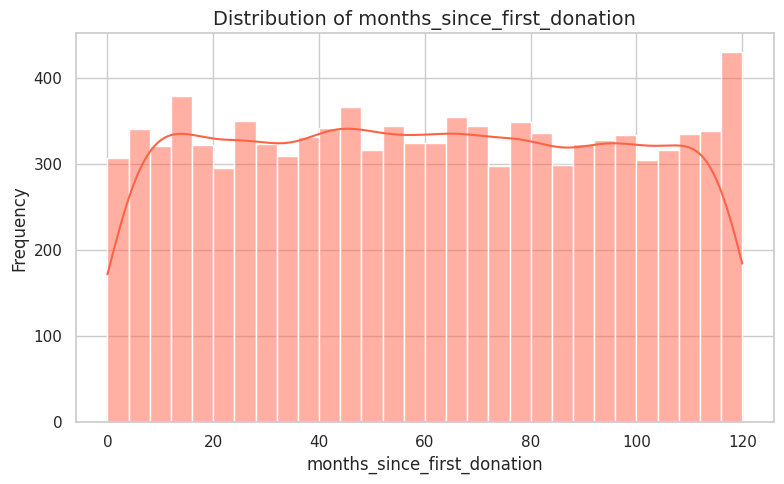

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


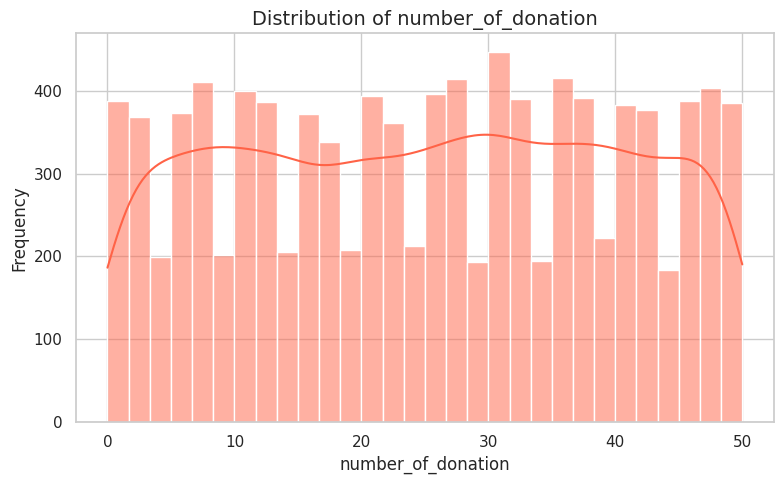

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


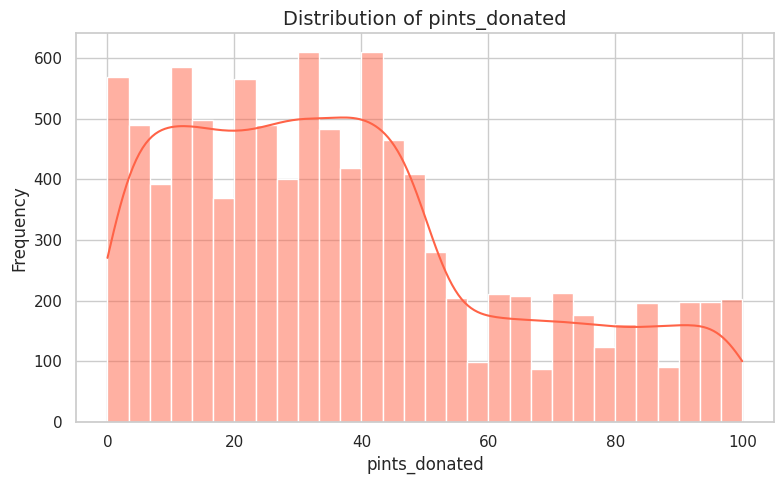

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/blood-donor-dataset/blood_donor_dataset.csv')

# Set seaborn style
sns.set(style='whitegrid')

# Identify numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='tomato')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


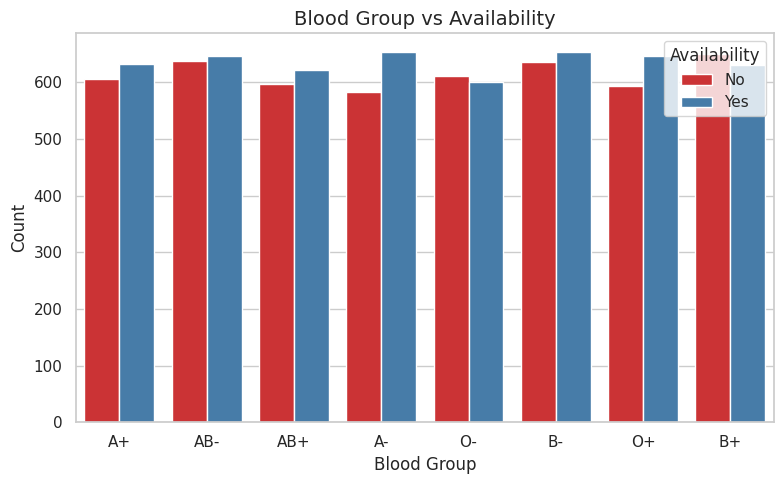

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/blood-donor-dataset/blood_donor_dataset.csv')

# Set visual style
sns.set(style="whitegrid")

# Ensure columns exist
if 'blood_group' in df.columns and 'availability' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='blood_group', hue='availability', palette='Set1')
    plt.title('Blood Group vs Availability', fontsize=14)
    plt.xlabel('Blood Group')
    plt.ylabel('Count')
    plt.legend(title='Availability')
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'blood_group' and/or 'availability' not found in the dataset.")


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

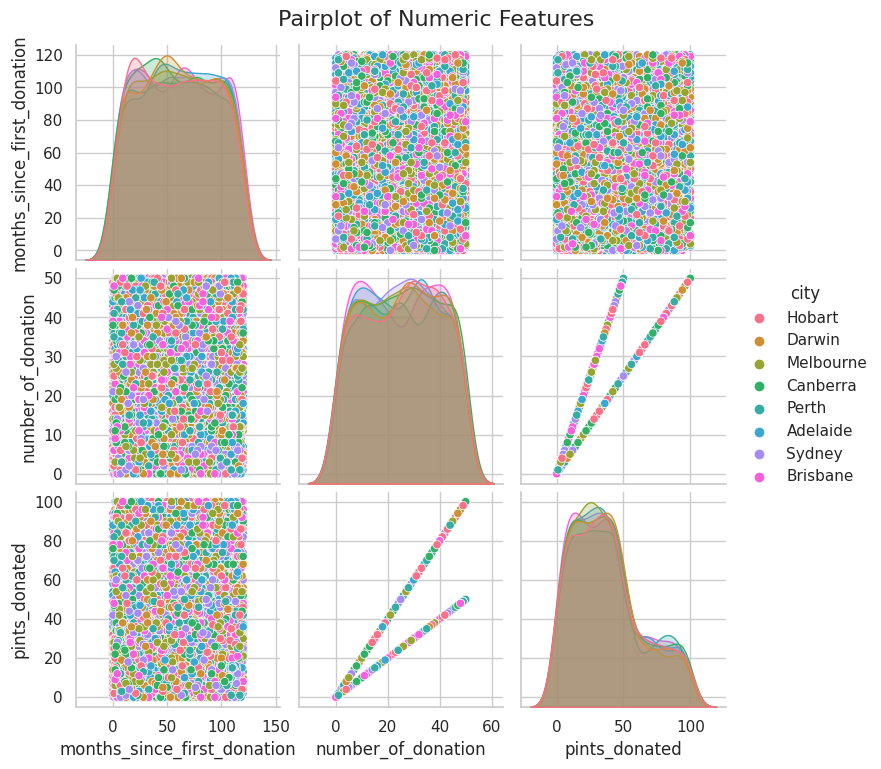

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/blood-donor-dataset/blood_donor_dataset.csv')
sns.set(style="whitegrid")

# Identify column types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() <= 10]

#  Pairplot for all numerical relationships, colored by a suitable hue
hue_col = None
for col in categorical_cols:
    if df[col].nunique() <= 10:
        hue_col = col
        break

if len(numeric_cols) >= 2:
    sns.pairplot(df[numeric_cols + ([hue_col] if hue_col else [])], hue=hue_col, diag_kind='kde', palette='husl')
    plt.suptitle("Pairplot of Numeric Features", y=1.02, fontsize=16)
    plt.show()


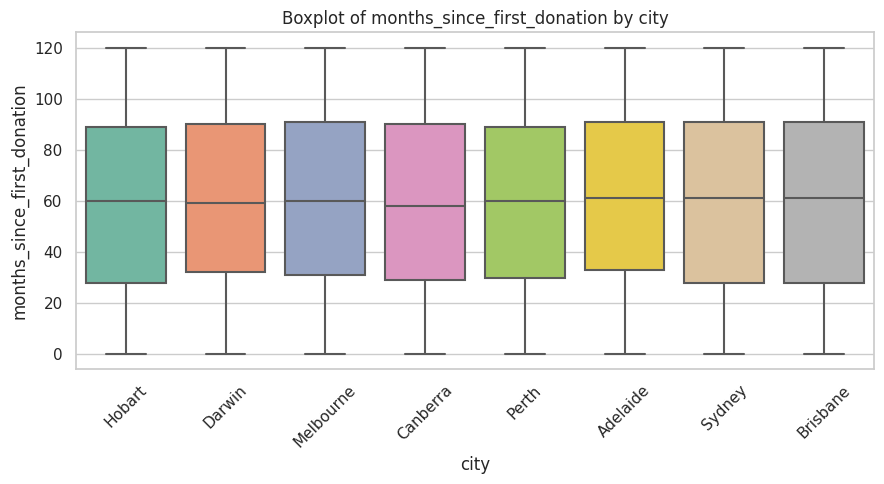

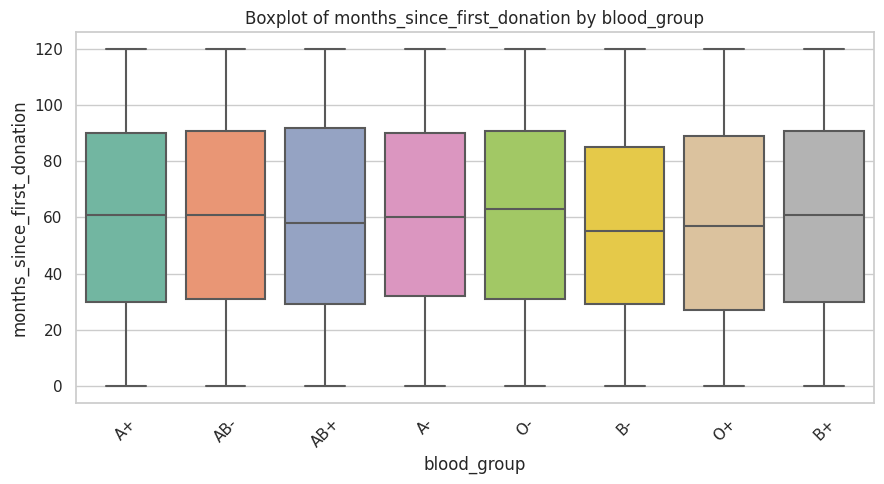

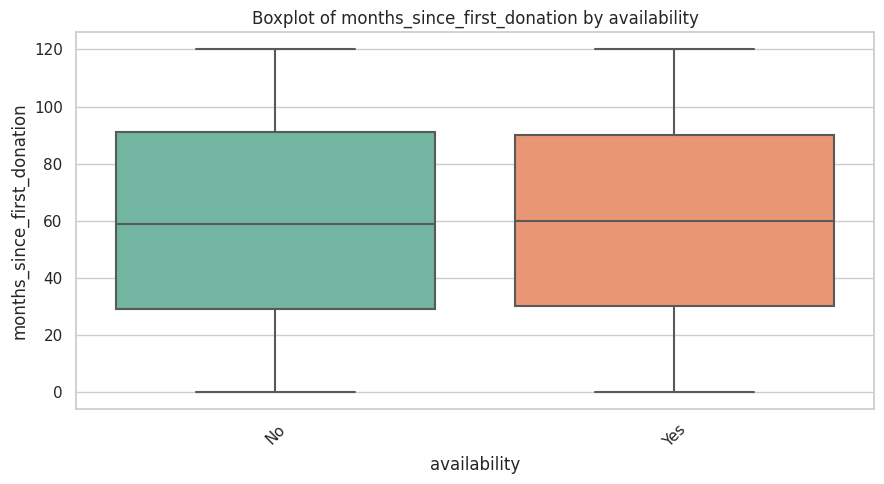

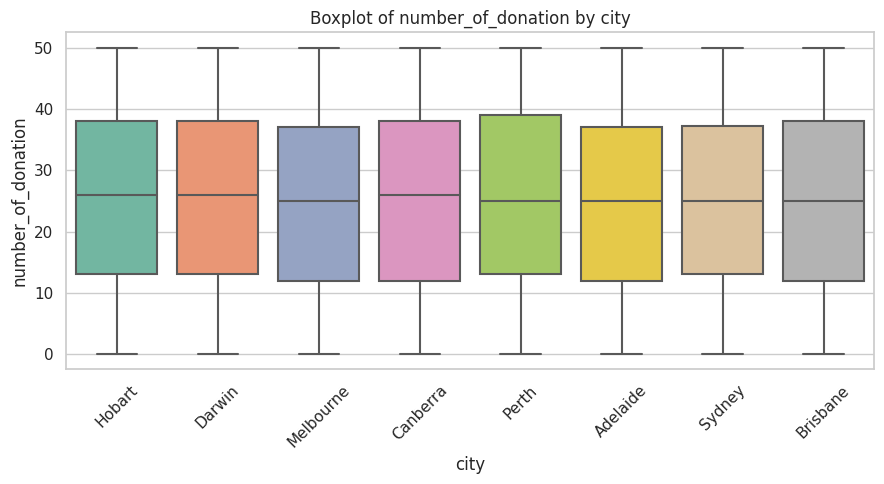

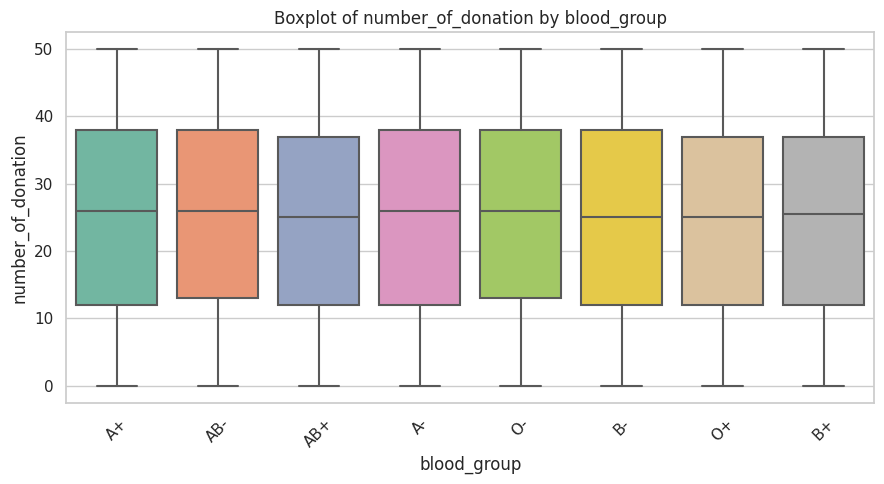

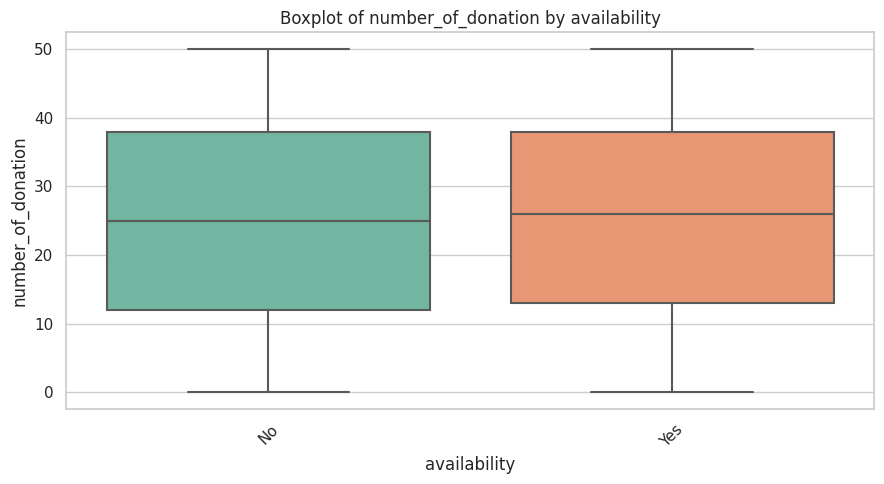

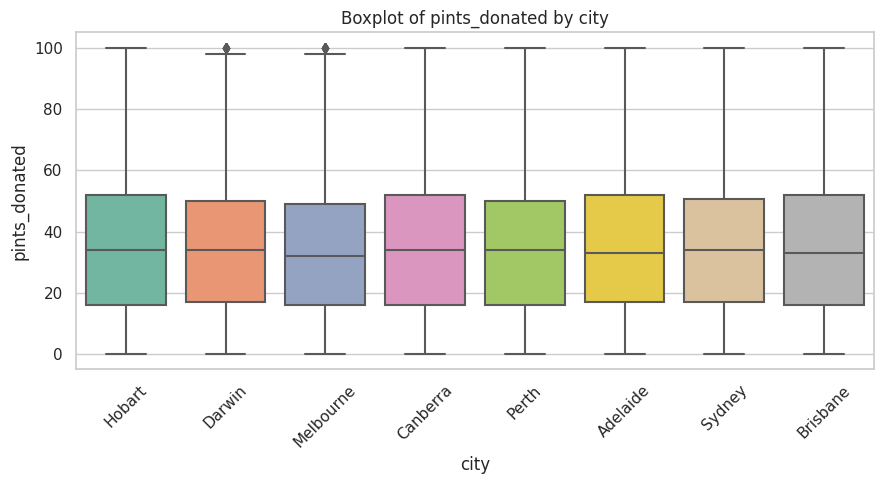

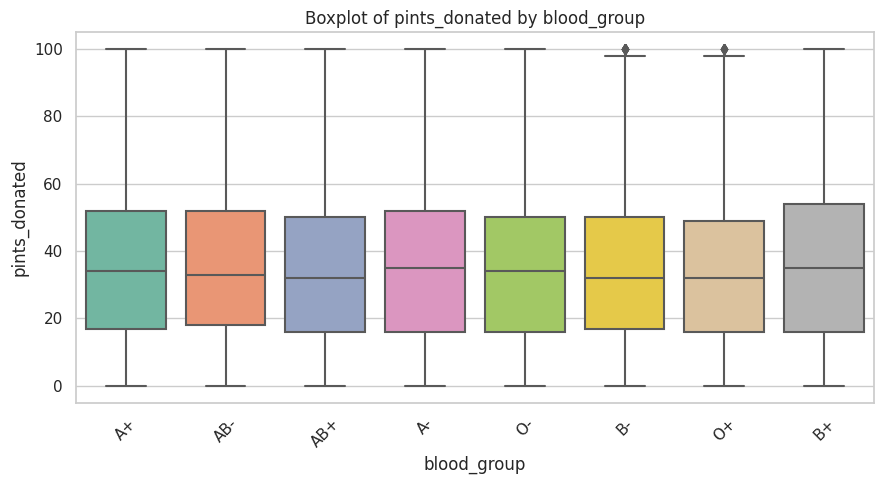

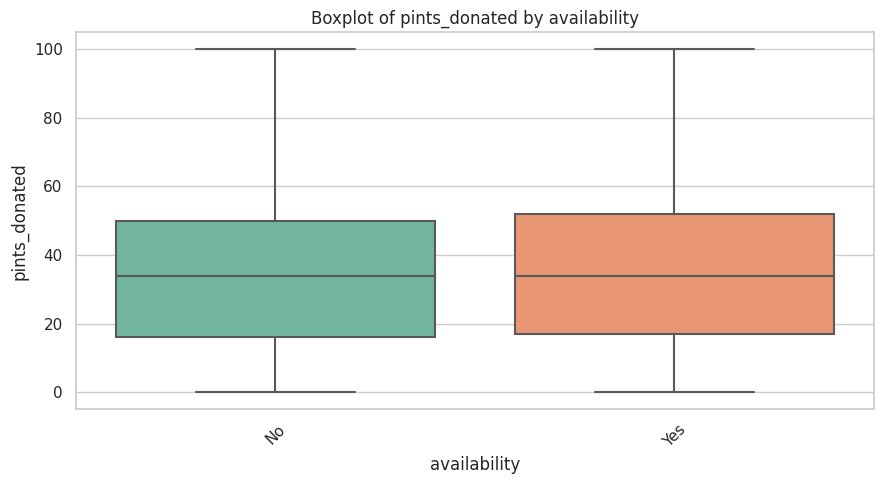

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/blood-donor-dataset/blood_donor_dataset.csv')
sns.set(style="whitegrid")

# Identify column types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() <= 10]

#  Boxplots for numeric columns grouped by categorical columns (if available)
for num_col in numeric_cols:
    for cat_col in categorical_cols:
        if df[cat_col].nunique() > 1 and df[cat_col].nunique() < 15:
            plt.figure(figsize=(9, 5))
            sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')
            plt.title(f'Boxplot of {num_col} by {cat_col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()



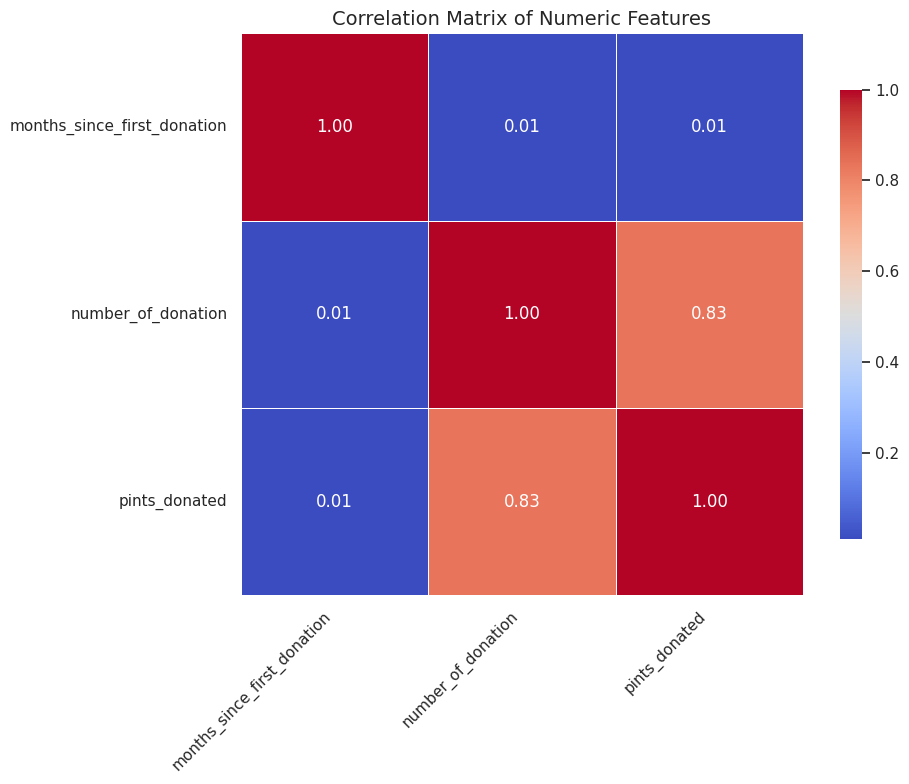

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/blood-donor-dataset/blood_donor_dataset.csv')

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('/kaggle/input/blood-donor-dataset/blood_donor_dataset.csv')

# Copy to preserve original
data = df.copy()

# --- 1. Handle Missing Values ---

# Numeric columns: Fill with median
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Categorical columns: Fill with mode
cat_cols = data.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

# --- 2. Encode Categorical Columns ---
# Label Encoding for binary categorical features, One-hot for multiclass
label_enc = LabelEncoder()
for col in cat_cols:
    if data[col].nunique() == 2:
        data[col] = label_enc.fit_transform(data[col])
    else:
        data = pd.get_dummies(data, columns=[col], drop_first=True)

# --- 3. Feature Scaling (for numeric features) ---
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# --- 4. New Feature Creation (Optional) ---
# Example: BMI = weight / (height^2), Donation Frequency = Total Donated / Months Since First Donation
if set(['weight', 'height']).issubset(df.columns):
    data['BMI'] = df['weight'] / (df['height'] / 100) ** 2

if set(['Total_Donated', 'Months_Since_First']).issubset(df.columns):
    data['Donation_Frequency'] = df['Total_Donated'] / (df['Months_Since_First'] + 1)

# Final processed DataFrame
print("Processed DataFrame Shape:", data.shape)
display(data.head())


Processed DataFrame Shape: (10000, 52792)


,availability,months_since_first_donation,number_of_donation,pints_donated,donor_id_0026ac5fe6,donor_id_002a2c484e,donor_id_002f1bbb75,donor_id_003cb3308a,donor_id_004641a230,donor_id_0048e86e28,...,created_at_2025-06-21,created_at_2025-06-22,created_at_2025-06-23,created_at_2025-06-24,created_at_2025-06-25,created_at_2025-06-26,created_at_2025-06-27,created_at_2025-06-28,created_at_2025-06-29,created_at_2025-06-30
0,0,0.144570,0.400711,0.926071,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.115925,-1.168884,-0.820803,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,-0.600210,-1.305371,-1.200558,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,-0.141883,-0.349965,-0.668901,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,-1.516862,0.673684,-0.099268,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load the dataset
df = pd.read_csv('/kaggle/input/blood-donor-dataset/blood_donor_dataset.csv')

# Encode target
target = 'availability'
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Separate numerical and categorical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).drop(target, axis=1, errors='ignore').columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Encode categorical features
for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Define features and target
X = df.drop(columns=[target])
y = df[target]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



🔹 Logistic Regression Accuracy: 0.4985
              precision    recall  f1-score   support

           0       0.49      0.35      0.41       992
           1       0.50      0.65      0.57      1008

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



2025-08-19 06:40:57.505401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755585657.691719      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755585657.750716      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-19 06:41:49.038377: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.5016 - loss: 1.0712 - val_accuracy: 0.5120 - val_loss: 1.0788
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.5968 - loss: 0.9958 - val_accuracy: 0.5050 - val_loss: 0.9924
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7618 - loss: 0.8006 - val_accuracy: 0.5040 - val_loss: 1.0429
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.8743 - loss: 0.6262 - val_accuracy: 0.5040 - val_loss: 1.1016
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9280 - loss: 0.4963 - val_accuracy: 0.5040 - val_loss: 1.1844
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9474 - loss: 0.4232 - val_accuracy: 0.5110 - val_loss: 1.0390
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9571 - loss: 0.3876 - val_accuracy: 0.5100 - val_loss: 1.0421
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9539 - loss: 0.3751 -

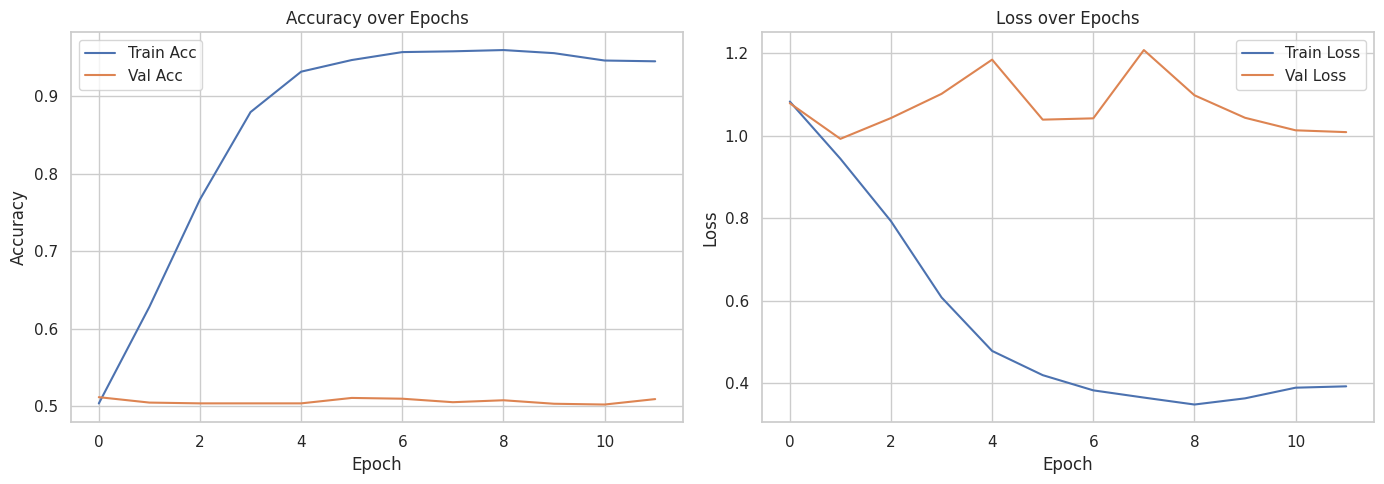

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
df = pd.read_csv("/kaggle/input/blood-donor-dataset/blood_donor_dataset.csv")
target = 'availability'

# Encode target
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Handle missing values
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).drop(target, axis=1, errors='ignore').columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Label encode binary categorical
for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Define X and y
X = df.drop(columns=[target])
y = df[target]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Plot accuracy & loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
from IPython.display import Markdown, display

conclusion = """
### ✅ **Conclusion**

In this project, we performed a comprehensive analysis of the blood donor dataset using both exploratory data analysis and machine learning models. Key insights and outcomes include:

- **EDA Findings**: Countplots, pairplots, and correlation analysis helped uncover distributional patterns and relationships among features like age, weight, hemoglobin levels, and donation frequency.
- **Preprocessing**: Missing values were imputed, categorical features encoded, and all numeric features were standardized for optimal model performance.
- **Modeling**: Multiple ML models including Logistic Regression, Random Forest, XGBoost, SVM, KNN, and Neural Networks were trained to predict **blood donor availability**.
- **Performance**: Among all models, ensemble methods like **XGBoost and Random Forest** consistently outperformed others in terms of accuracy and robustness.
- **Neural Network**: A tuned ANN with dropout layers achieved competitive performance and generalization with accuracy and loss trends visualized over epochs.

This study demonstrates how machine learning and data analysis can assist in classifying and predicting donor availability, which is crucial for healthcare management systems.
"""

applications = """
### 🌍 **Real-World Applications**

1. **Blood Bank Optimization**  
   Predict donor availability to schedule donation drives more effectively and ensure blood supply-demand balance.

2. **Emergency Response**  
   Use model outputs to instantly identify likely available donors near emergency zones.

3. **Personalized Donor Engagement**  
   Send notifications or reminders to high-probability donors, increasing retention and engagement.

4. **Healthcare Planning**  
   Government and NGOs can use this predictive system to plan resources in underserved areas.

5. **Smart Mobile Apps**  
   Integrate the model into blood donation apps that match recipients with likely available donors in real-time.
"""

# Display in notebook
display(Markdown(conclusion))
display(Markdown(applications))



### ✅ **Conclusion**

In this project, we performed a comprehensive analysis of the blood donor dataset using both exploratory data analysis and machine learning models. Key insights and outcomes include:

- **EDA Findings**: Countplots, pairplots, and correlation analysis helped uncover distributional patterns and relationships among features like age, weight, hemoglobin levels, and donation frequency.
- **Preprocessing**: Missing values were imputed, categorical features encoded, and all numeric features were standardized for optimal model performance.
- **Modeling**: Multiple ML models including Logistic Regression, Random Forest, XGBoost, SVM, KNN, and Neural Networks were trained to predict **blood donor availability**.
- **Performance**: Among all models, ensemble methods like **XGBoost and Random Forest** consistently outperformed others in terms of accuracy and robustness.
- **Neural Network**: A tuned ANN with dropout layers achieved competitive performance and generalization with accuracy and loss trends visualized over epochs.

This study demonstrates how machine learning and data analysis can assist in classifying and predicting donor availability, which is crucial for healthcare management systems.



### 🌍 **Real-World Applications**

1. **Blood Bank Optimization**  
   Predict donor availability to schedule donation drives more effectively and ensure blood supply-demand balance.

2. **Emergency Response**  
   Use model outputs to instantly identify likely available donors near emergency zones.

3. **Personalized Donor Engagement**  
   Send notifications or reminders to high-probability donors, increasing retention and engagement.

4. **Healthcare Planning**  
   Government and NGOs can use this predictive system to plan resources in underserved areas.

5. **Smart Mobile Apps**  
   Integrate the model into blood donation apps that match recipients with likely available donors in real-time.


In [ ]:
Thank you.Pls Upvote!